  label                               text
0   ham    Go until jurong point, crazy.. 
1   ham      Ok lar... Joking wif u oni...
2  spam            Free entry in 2 a wkly 
3   ham          U dun say so early hor...
4   ham  Nah I don't think he goes to usf,
coloums: Index(['label', 'text'], dtype='object')
Accuracy: 0.9434724091520862

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1925
           1       1.00      0.59      0.74       304

    accuracy                           0.94      2229
   macro avg       0.97      0.79      0.85      2229
weighted avg       0.95      0.94      0.94      2229



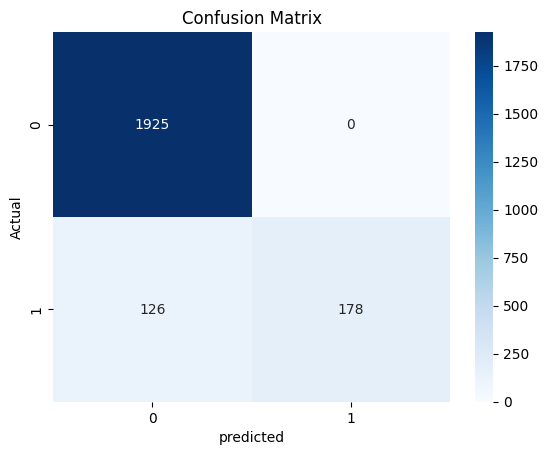

'Ham'

In [13]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns


from sklearn.model_selection import  train_test_split
from  sklearn.feature_extraction.text  import TfidfVectorizer
from  sklearn.naive_bayes  import MultinomialNB
from  sklearn.metrics import  classification_report,confusion_matrix,accuracy_score


import  nltk
import  string

# load  dataset
df=pd.read_csv('spam.dataset.csv',encoding='latin-1' , sep='\t',header=None)
df.columns=['label','text']
print (df.head())
print( 'coloums:',df.columns)

# df=df[['v1','v2']]
# df.columns=['label','text']


# convert  lables to  binary
df['label']=df['label'].map  ({'ham':0,'spam':1})

# clean  text   basic
def  clean_text(text):
    text="".join([char  for  char  in  text if char  not in  string.punctuation])
    return   text.lower()

df['clean_text']=df['text'].apply(clean_text)

# train  test split
x=df['clean_text']
y=df['label']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.4, random_state=45)

# vectorization
tfidf=TfidfVectorizer()
x_train_tfidf=tfidf.fit_transform(x_train)
x_test_tfidf=tfidf.transform(x_test)

# model traning
model=MultinomialNB()
model.fit(x_train_tfidf,y_train)

# model evalution
y_pred=model.predict(x_test_tfidf)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("\nClassification Report:\n",classification_report(y_test,y_pred))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")
plt.show()

# prediction function
def predict_spam(message):
    cleaned=clean_text(message)
    vectorized=tfidf.transform([cleaned])
    prediction=model.predict(vectorized)
    return 'spam' if prediction[0] ==1 else 'Ham'

# test
predict_spam("congratlations! You've won  a free ticket.")
predict_spam("congratulation! You won a free iphone")
predict_spam("I will call you back in 10 mints")